In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cooler
import cooltools
import cooltools.lib.plotting
from cooltools.api.insulation import calculate_insulation_score, find_boundaries
from skimage.filters import threshold_li, threshold_otsu
import bbi
from sklearn.cluster import KMeans
import matplotlib as mpl
import bioframe as bf
import glob
from tqdm import tqdm

In [2]:
#### A way to use externel fonts in matplotlib without installing it
from matplotlib import font_manager
font_dirs = ['/users/ankit.gupta/.fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
#### A way to use externel fonts in matplotlib without installing it

mpl.rcParams['font.family'] = 'Nunito'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2

# multi resolution analysis

In [3]:
# boundariesFiles = glob.glob("../../../spt5_project/microC_boundaries/*.boundaries_1kb_res.tsv")
boundariesFiles = ("../../../spt5_project/microC_boundaries/WT.boundaries_1kb_res.tsv", "../../../spt5_project/microC_boundaries/KO.boundaries_1kb_res.tsv")

In [4]:
boundariesFiles

('../../../spt5_project/microC_boundaries/WT.boundaries_1kb_res.tsv',
 '../../../spt5_project/microC_boundaries/KO.boundaries_1kb_res.tsv')

In [5]:
boundariesDict = dict(wt={},ko={})
for i in boundariesFiles:
    if "WT" in i:
        boundariesDict["wt"][i.split("_")[-2]] = pd.read_csv(i,sep="\t")
    else:
        boundariesDict["ko"][i.split("_")[-2]] = pd.read_csv(i,sep="\t")

In [6]:
boundariesDict["wt"]["1kb"]

,chrom,start,end,is_bad_bin,log2_insulation_score_5000,n_valid_pixels_5000,log2_insulation_score_15000,n_valid_pixels_15000,log2_insulation_score_25000,n_valid_pixels_25000,boundary_strength_5000,boundary_strength_15000,boundary_strength_25000
0,chr1,0,1000,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
1,chr1,1000,2000,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2,chr1,2000,3000,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
3,chr1,3000,4000,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
4,chr1,4000,5000,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654902,chrY,15898000,15899000,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2654903,chrY,15899000,15900000,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2654904,chrY,15900000,15901000,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2654905,chrY,15901000,15902000,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN


In [8]:
len(boundariesDict["wt"]["1kb"]["boundary_strength_25000"][boundariesDict["wt"]["1kb"]["boundary_strength_25000"] > 0])

452006

In [10]:
allRes = ["1kb", "2kb", "5kb"]
allWindows = {"1kb":[5000, 15000, 25000], 
              "2kb":[10000, 20000, 50000], 
              "5kb":[25000, 50000, 100000]}

In [ ]:
liFilteredBoudaries["wt"]["1kb"]["boundary_strength_25000"]

In [12]:
liFilteredBoudaries["ko"]["1kb"]["boundary_strength_25000"]

,chrom,start,end,is_bad_bin,log2_insulation_score_5000,n_valid_pixels_5000,log2_insulation_score_15000,n_valid_pixels_15000,log2_insulation_score_25000,n_valid_pixels_25000,boundary_strength_5000,boundary_strength_15000,boundary_strength_25000
3183,chr1,3183000,3184000,True,-0.208743,16.0,-0.207557,182.0,-0.112018,528.0,0.797588,0.582229,0.699130
3232,chr1,3232000,3233000,True,NaN,0.0,-1.208295,117.0,-1.127727,437.0,NaN,NaN,1.786254
3266,chr1,3266000,3267000,True,NaN,0.0,-0.687451,120.0,-0.610512,418.0,NaN,NaN,1.101047
3338,chr1,3338000,3339000,True,-2.612684,3.0,-0.720663,143.0,-0.764263,483.0,NaN,NaN,1.281531
3490,chr1,3490000,3491000,True,-0.552596,12.0,-0.461185,182.0,-0.259689,528.0,NaN,0.922788,0.597002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638381,chrX,166028000,166029000,True,-0.841235,16.0,-0.650525,196.0,-0.589635,552.0,1.188924,1.184032,1.114770
2638455,chrX,166102000,166103000,False,-1.493591,22.0,-0.453611,222.0,-0.404266,622.0,2.313963,NaN,0.789918
2638532,chrX,166179000,166180000,True,NaN,0.0,-0.179652,140.0,-0.238359,456.0,NaN,NaN,0.597781
2638580,chrX,166227000,166228000,False,-0.237058,22.0,-0.188092,222.0,-0.196592,622.0,0.044550,0.118077,0.521492


In [13]:
bsCol = {"wt":np.array(liFilteredBoudaries["wt"]["1kb"]["boundary_strength_15000"]["boundary_strength_15000"]), 
              "ko":np.array(liFilteredBoudaries["ko"]["1kb"]["boundary_strength_15000"]["boundary_strength_15000"])}

bsColIndex = {"wt":np.array(liFilteredBoudaries["wt"]["1kb"]["boundary_strength_15000"].index), 
              "ko":np.array(liFilteredBoudaries["ko"]["1kb"]["boundary_strength_15000"].index)}

insCol = {"wt":np.array(boundariesDict["wt"]["1kb"]["log2_insulation_score_15000"]), 
         "ko":np.array(boundariesDict["ko"]["1kb"]["log2_insulation_score_15000"])}

In [14]:
bsCol

{'wt': array([1.03204221, 0.8509101 , 1.10989725, ..., 0.44002417, 1.00922452,
        1.52632492]),
 'ko': array([0.92957187, 0.58222878, 0.65296999, ..., 0.47588903, 1.34287609,
        0.73560118])}

In [15]:

bs = {}
bs["wt"] = []
bs["ko"] = []
for i in tqdm(bsColIndex["wt"]):
    bs["wt"].append(insCol["wt"][i-50:i+51])
    bs["ko"].append(insCol["ko"][i-50:i+51])
bs["wt"] = np.array(bs["wt"])
bs["ko"] = np.array(bs["ko"])

100%|██████████| 41722/41722 [00:00<00:00, 459417.16it/s]


In [16]:
bs["wt"].shape

(41722, 101)

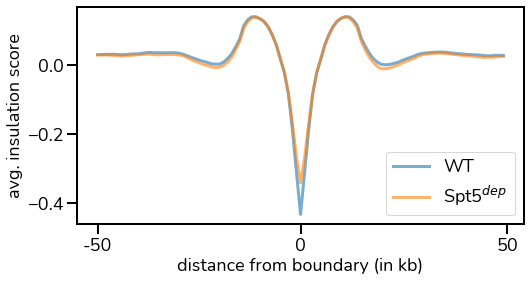

In [31]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(np.nanmean(bs["wt"],axis=0),lw=3,label="WT",alpha=0.6)
ax.plot(np.nanmean(bs["ko"],axis=0),lw=3,label="Spt5$^{dep}$",alpha=0.6)
ax.set(xlabel="distance from boundary (in kb)", 
       ylabel="avg. insulation score")
ax.set_xticks([0,50,101],[-50,0,50])

ax.legend(loc="lower right")
# plt.savefig("avg_insulation_score.png",dpi=300,bbox_inches="tight")
# plt.savefig("avg_insulation_score.pdf",dpi=300,bbox_inches="tight")

In [18]:
bs["wt"].shape

(41722, 101)

Text(0.5, 0.01, 'distance from boundary (in kb)')

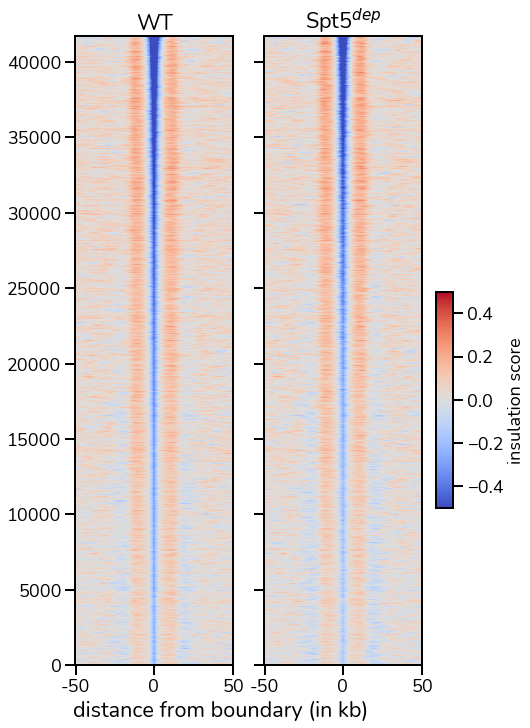

In [34]:
fig,ax = plt.subplots(1,2,figsize=(6,10),sharex=True,sharey=True,constrained_layout=True)
pileupKwargsDict = dict(cmap="coolwarm",vmin=-0.5,vmax=0.5,aspect="auto",origin="lower")
ax[0].imshow(np.nan_to_num(bs["wt"][np.argsort(bsCol["wt"])]),**pileupKwargsDict)
ax[1].imshow(np.nan_to_num(bs["ko"][np.argsort(bsCol["wt"])]),**pileupKwargsDict)

ax[0].set_title("WT")
ax[1].set_title("Spt5$^{dep}$")
ax[0].set_xticks([0,50,101],[-50,0,50])
ax[1].set_xticks([0,50,101],[-50,0,50])

ax3 = fig.add_axes([1.0, 0.3,0.04, 0.3])
cb = mpl.colorbar.ColorbarBase(ax3, orientation='vertical', 
                               cmap='coolwarm',norm=mpl.colors.Normalize(-0.50, 0.50),label="insulation score")

fig.supxlabel("distance from boundary (in kb)")
# plt.savefig("insulation_score_pileup.png",dpi=300,bbox_inches="tight")
# plt.savefig("insulation_score_pileup.pdf",dpi=300,bbox_inches="tight")